## **3- Classification sur une variable dérivée de la variable "Satisfaction" :**


a. Créer une variable binaire à partir la variable "Satisfaction" : on regroupera les observations des classes "Neutral" et "dissatisfied" en une seule classe.


b. Reprendre les étapes de la question 2 avec cette nouvelle variable comme variable cible.

In [1]:
# Imports

from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, StandardScaler
import seaborn as sns
import joblib
import math
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
# from sklearn.neighbors import KNeighborsRegressor, DecisionTreeRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import FunctionTransformer
from sklearn.impute import KNNImputer




### a. Voir 3-a dans le notebook 1-pretraitement

### b. Analyse

In [2]:
df = pd.read_csv("df_analysis.csv")

bin_variables = ["Gender", "Customer Type", "Type of Travel" ]
num_variables = [ "Leg room service", "Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes", "Inflight service", "Inflight wifi service", "On-board service", "Checkin service", "Departure/Arrival time convenient", "Ease of Online booking", "Gate location", "Food and drink", "Online boarding", "Baggage handling", "Seat comfort", "Inflight entertainment", "Cleanliness"]
ord_variables = ["Class"]
targets= ["satisfaction", "Price", "bin_satisfaction"]

#Just for visualization
cat_variables= ["Gender", "Customer Type", "Type of Travel", "Leg room service", "Inflight wifi service", "Inflight service", "Departure/Arrival time convenient", "Ease of Online booking", "On-board service", "Checkin service", "Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment", "Baggage handling", "Cleanliness", "Class"]

#### Variables explicatives catégorielles

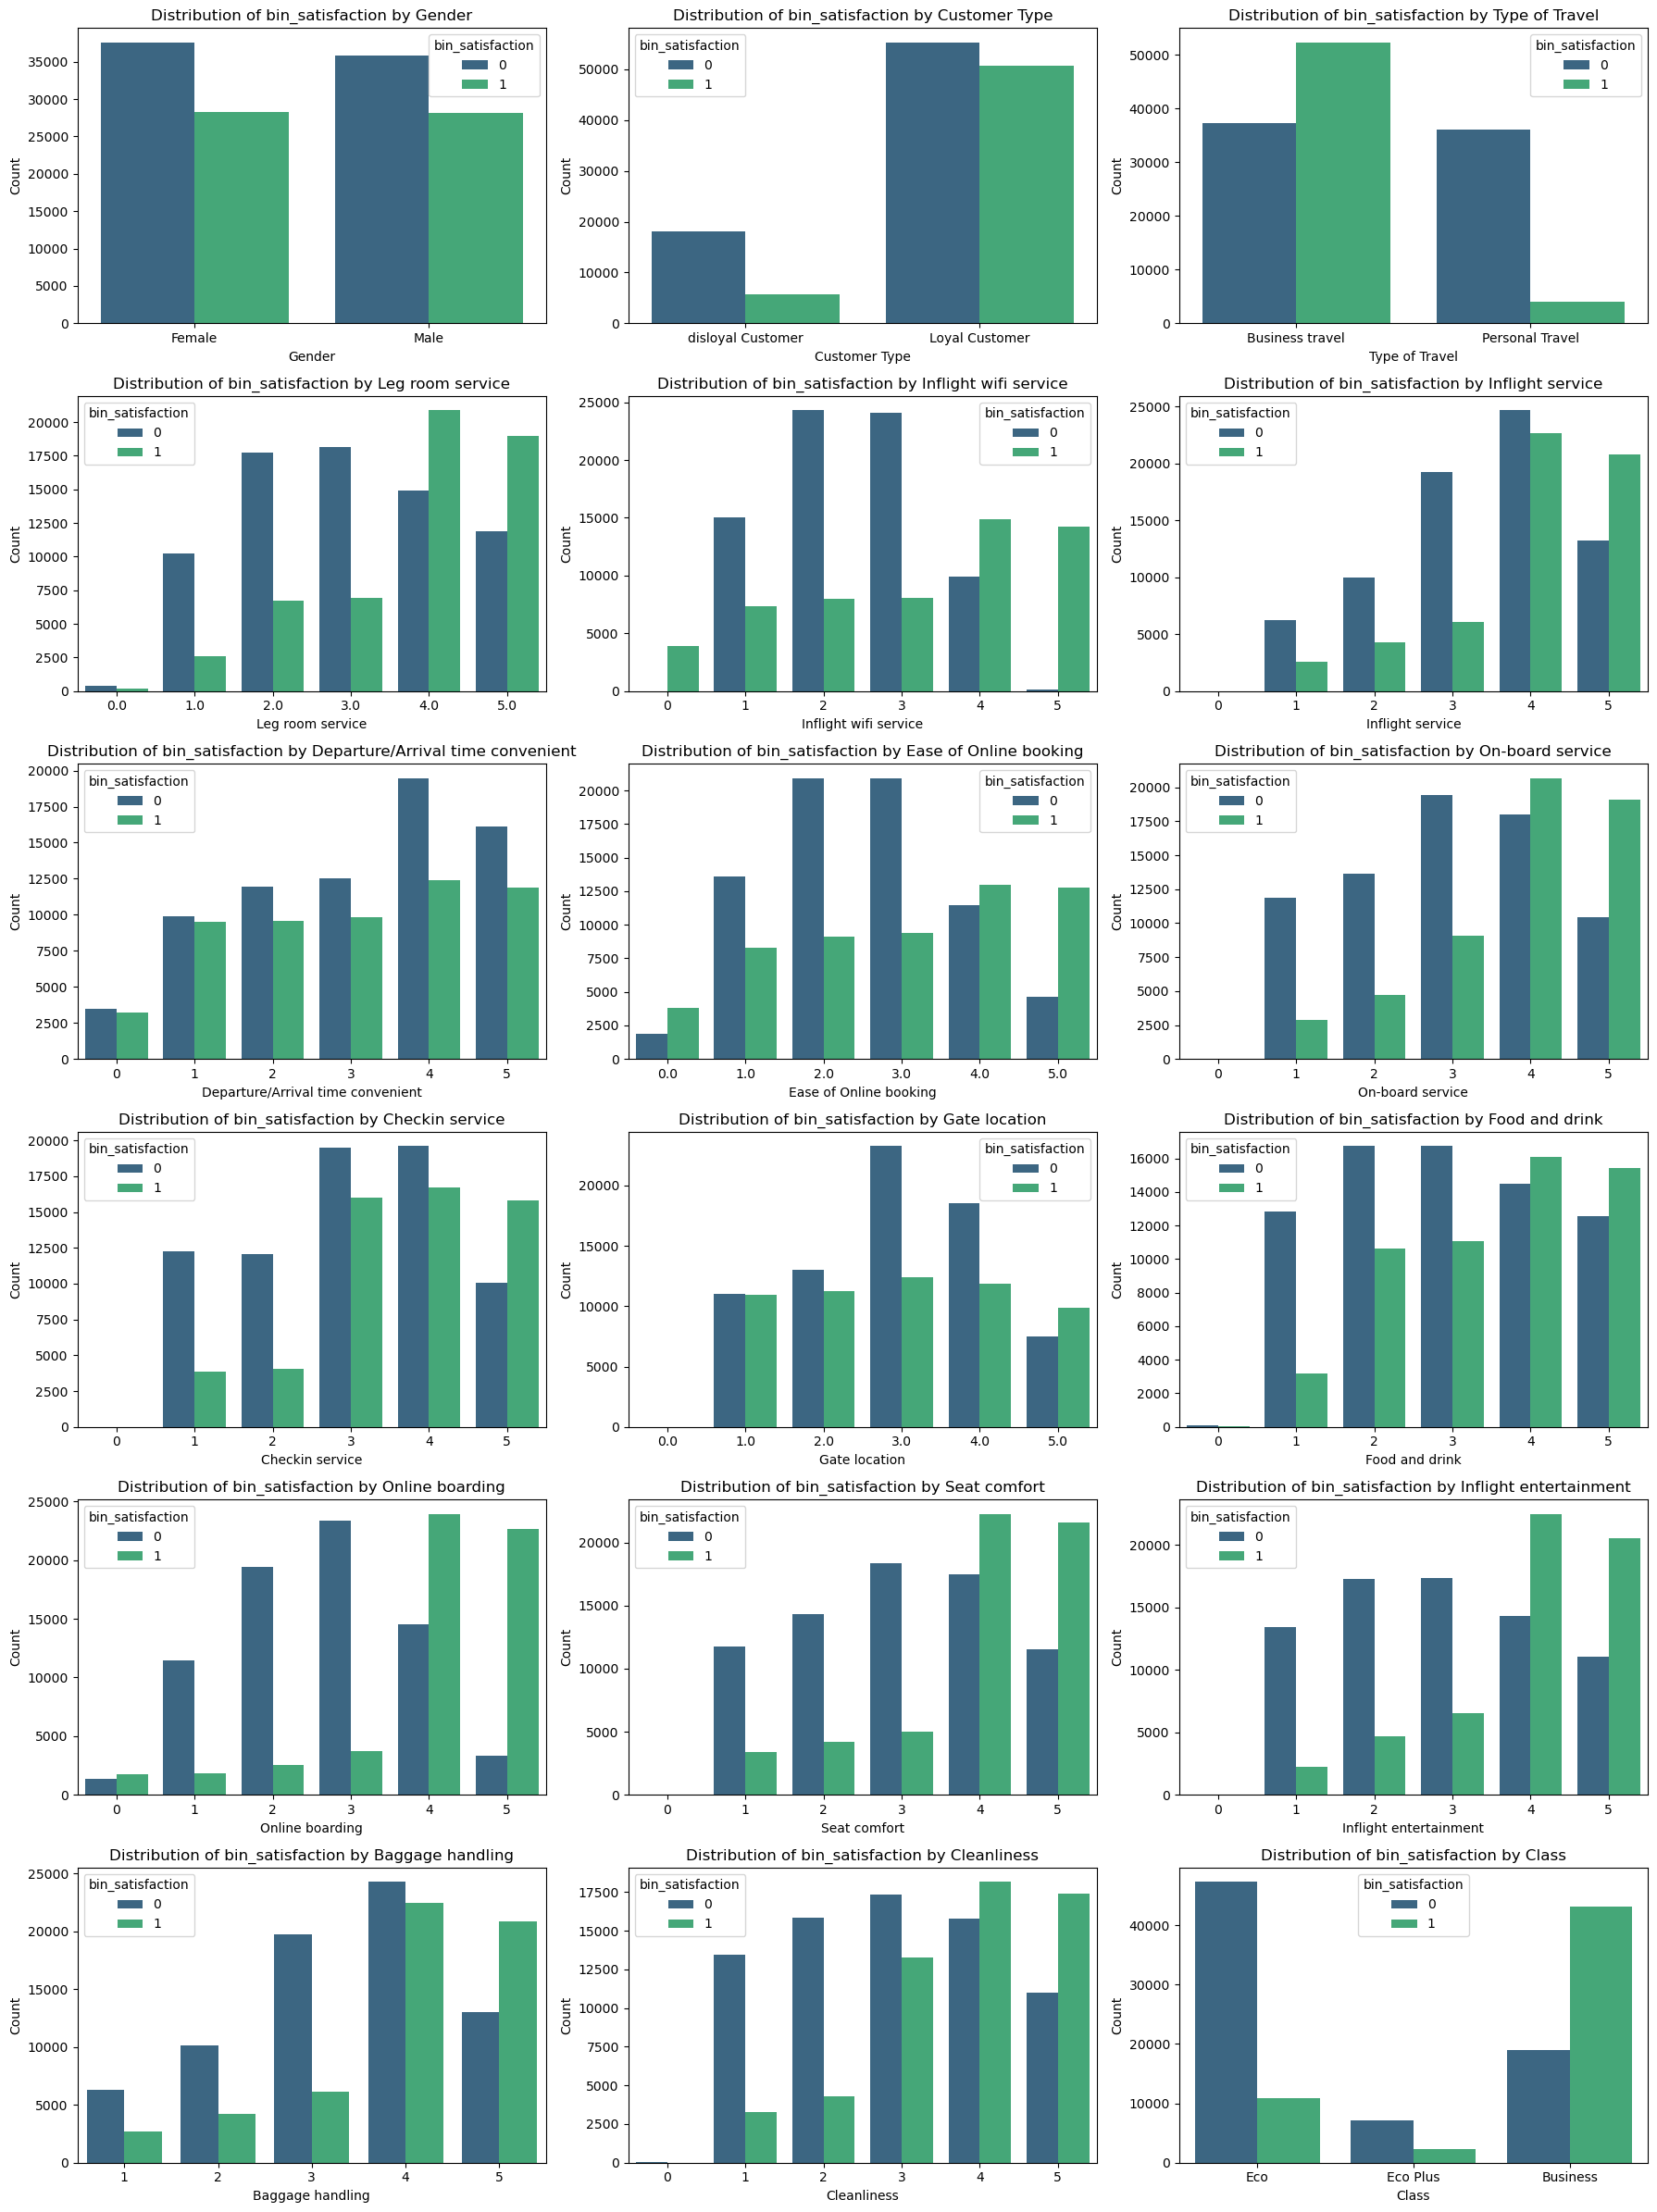

In [3]:
n_cols = 3  # Nombre de graphiques par ligne
n_rows = (len(cat_variables) + n_cols - 1) // n_cols  # Calcul du nombre de lignes nécessaires

plt.figure(figsize=(6 * n_cols, 4 * n_rows))  # Ajuster la taille de la figure

for i, var in enumerate(cat_variables):
    plt.subplot(n_rows, n_cols, i + 1)  # Créer un sous-graphique
    # Assurez-vous que 'bin_satisfaction' est une chaîne pour les légendes
    sns.countplot(x=var, hue=df['bin_satisfaction'].astype(str), palette="viridis", data=df)
    plt.title(f'Distribution of bin_satisfaction by {var}')
    plt.xlabel(var)
    plt.ylabel('Count')

plt.tight_layout()  # Ajuster automatiquement les sous-graphiques pour qu'ils ne se chevauchent pas
plt.show()

#### Variables explicatives numériques

/var/folders/1k/1sj3zxpx1x78x8blphwrrcrc0000gn/T/ipykernel_2809/2969454215.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['bin_satisfaction'] == 0][col], label='Dissatified or neutral', shade=True)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/1k/1sj3zxpx1x78x8blphwrrcrc0000gn/T/ipykernel_2809/2969454215.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['bin_satisfaction'] == 1][col], label='Satisfied', shade=True)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119

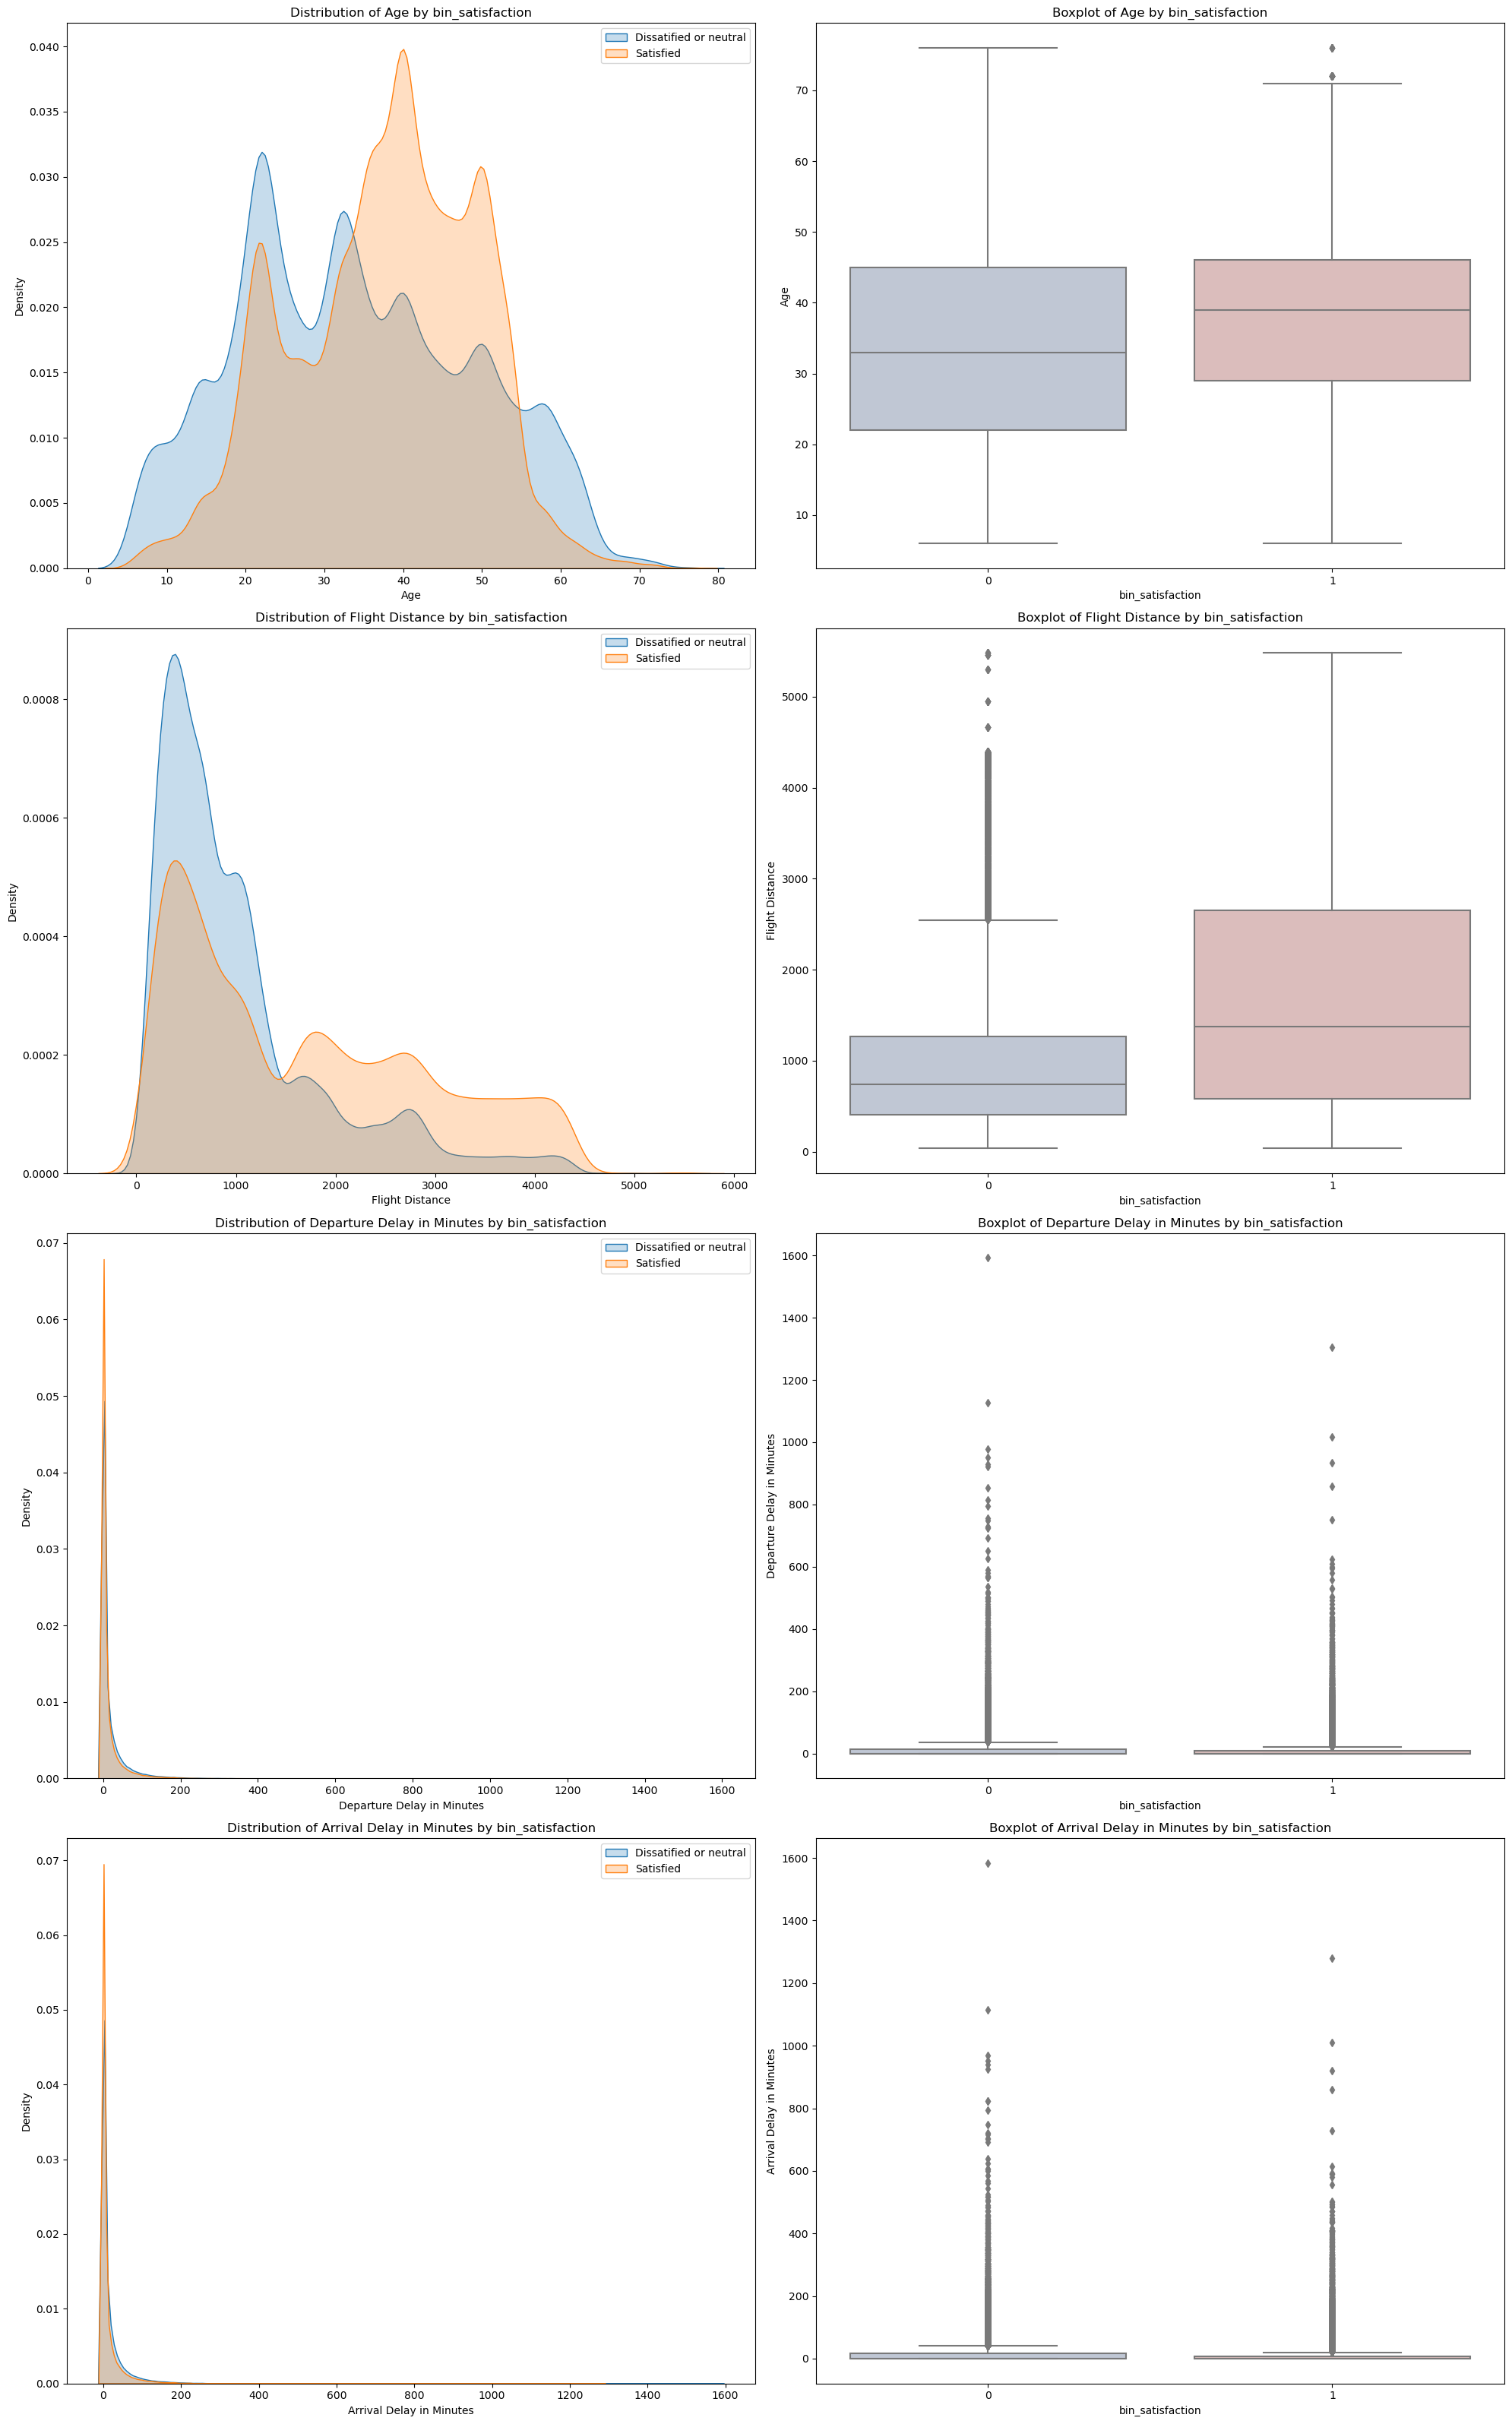

In [4]:
no_cat_variables = [
    col for col in df.columns 
    if col not in cat_variables and col not in targets
]

n_cols = 2
n_rows = (len(no_cat_variables) + n_cols - 1) // n_cols * 2  # Multiplié par 2 pour inclure les boxplots

plt.figure(figsize=(10 * n_cols, 8 * n_rows))  # Ajustement de la taille pour mieux s'adapter aux deux types de plots

for i, col in enumerate(no_cat_variables):
    # Tracé des graphiques de densité
    plt.subplot(n_rows, n_cols, 2 * i + 1)  # 2 * i + 1 pour laisser de la place pour les boxplots en dessous de chaque kdeplot
    sns.kdeplot(data=df[df['bin_satisfaction'] == 0][col], label='Dissatified or neutral', shade=True)
    sns.kdeplot(data=df[df['bin_satisfaction'] == 1][col], label='Satisfied', shade=True)
    plt.title(f'Distribution of {col} by bin_satisfaction')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()

    # Ajout de boxplots sous chaque graphique de densité
    plt.subplot(n_rows, n_cols, 2 * i + 2)  # 2 * i + 2 pour les boxplots juste en dessous des kdeplots
    sns.boxplot(x='bin_satisfaction', y=col, data=df, palette="vlag")
    plt.title(f'Boxplot of {col} by bin_satisfaction')
    plt.xlabel('bin_satisfaction')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

- Les personnes plus satisfaites semblent légèrement plus âgées.
- Les personnes satisfaites semblent avoir fait davantage de kilomètres en vol.

Mêmes conclusions que précédemment pour "Departure Delay" et "Arrival delay" que précédemment.

### b. Prétraitement

In [5]:
df = pd.read_csv("df_bin_satisfaction.csv")

#### Supprimer les colonnes inutiles

In [6]:
variables_to_remove = ["Unnamed: 0", "id"]

df = df.drop(variables_to_remove, axis=1)

df.dtypes

Gender                                object
Customer Type                         object
Age                                  float64
Type of Travel                        object
Class                                 object
Flight Distance                      float64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking               float64
Gate location                        float64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                     float64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

#### Nombre de valeurs nulles

In [7]:
print("🚀 ~ df:")
print(df.shape)
print("null_values:", df.isnull().values.sum())
print("null_values by column:", df.isnull().sum())

# print(df.head)

🚀 ~ df:
(129880, 25)
null_values: 913
null_values by column: Gender                                 0
Customer Type                          0
Age                                  126
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking               131
Gate location                        130
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                     133
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                         

Il faudra faire une imputation.

#### Formater les variables binaires (pipeline)
Comme elles ne sont pas sous la forme d'un boolean, on remplace chacune des 2 valeurs par 0 ou 1.

In [8]:
def set_bin_num(df):
    # Création d'un nouveau DataFrame pour les résultats
    result = df.copy()
    conditions = [
        (df['Gender'] == "Male") | (df['Customer Type'] == "disloyal Customer") | (df['Type of Travel'] == "Personal Travel")
    ]
    # Utiliser np.select pour assigner 0 ou 1 selon les conditions
    result['Gender'] = np.select(conditions, [0], default=1)
    result['Customer Type'] = np.select(conditions, [0], default=1)
    result['Type of Travel'] = np.select(conditions, [0], default=1)
    
    return result[['Gender', 'Customer Type', 'Type of Travel']]


In [9]:
bin_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", FunctionTransformer(set_bin_num, validate=False))
    ]
)

#### Formater les variables ordinales (pipeline)

In [10]:
# Transforme les strings en nombres qui sont ordonnés entre eux

satisfaction_pipeline = Pipeline(steps=[
  ("imputer", SimpleImputer(strategy="most_frequent")),
  ("satisfaction_encoder", OrdinalEncoder(categories=[["dissatisfied", "neutral", "satisfied"]]))
])

class_pipeline = Pipeline(steps=[
  ("imputer", SimpleImputer(strategy="most_frequent")),
  ("class_encoder", OrdinalEncoder(categories=[["Eco", "Eco Plus", "Business"]])),
])

#### Formater les variables numériques (pipeline)
Comme les variables numériques ne suivent pas une loi normale, on doit normaliser avec le min et le max (et non avec le standardScaler)

In [11]:
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, columns, factor = 1.5, remove=True):
        self.columns = columns
        self.factor = factor
        self.remove = remove
        self.kept_indices = None
        
    def remove_outliers(self, X):
        l = []
        for c in self.columns:
            Q1 = X[c].quantile(0.25)
            Q3 = X[c].quantile(0.75)
            delta = Q3-Q1
            lower_bound = Q1 - self.factor*delta
            upper_bound = Q3 + self.factor*delta
            column = X[c].loc[ ( (X[c] >= lower_bound) & (X[c] <= upper_bound) )  ]
            l.append( pd.Series(column) )
            
        res = pd.concat(l, axis=1, join = "inner")
        
        self.kept_indices = res.index
        
        return X.loc[self.kept_indices]
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        if self.remove:
            return self.remove_outliers(X)
        else:
            self.kept_indices = X.index
            return X

outlier_pipeline = Pipeline(steps = [("outliers", OutlierRemover(columns=df.drop(["bin_satisfaction", 'satisfaction'], axis=1).columns, factor=1.5, remove=False))])

In [12]:
num_pipeline = Pipeline(steps=[
  ('imputer', KNNImputer()),
  ("scaler", MinMaxScaler())
])

#### Définition de la pipeline dans l'ordre

In [13]:
preprocessor = ColumnTransformer(transformers=[
    ("class", class_pipeline, ["Class"]),
    ("satisfaction", satisfaction_pipeline, ["satisfaction"]),
    ("bin", bin_pipeline, bin_variables),
    ("num", num_pipeline, num_variables)
], remainder="passthrough", verbose_feature_names_out=False)  # Correction: retirer `verbose = 4,` qui est mal placé et incorrect

preprocessor.set_output(transform='pandas')

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_function_transformer.py:345: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('class',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('class_encoder',
                                                  OrdinalEncoder(categories=[['Eco',
                                                                              'Eco '
                                                                              'Plus',
                                                                              'Business']]))]),
                                 ['Class']),
                                ('satisfaction',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('satisfaction_encoder',
                                                  OrdinalEncoder(cat...
                                 ['Leg room service', 'Age', 'Flight Distance',
                                  'Departure Delay in Minutes',
                                  'Arrival Delay in Minutes',
                                  'Inflight service', 'Inflight wifi service',
                                  'On-board service', 'Checkin service',
                                  'Departure/Arrival time convenient',
                                  'Ease of Online booking', 'Gate location',
                                  'Food and drink', 'Online boarding',
                                  'Baggage handling', 'Seat comfort',
                                  'Inflight entertainment', 'Cleanliness'])],
                  verbose_feature_names_out=False)

In [14]:
pipeline = Pipeline([
    ("outlier_remover", outlier_pipeline),
    ("preprocessor", preprocessor)
])

df_clean = pipeline.fit_transform(df)

#### Découpage du dataset en datasets d'entrainement et de test

In [15]:
X = df_clean.drop(["satisfaction", "bin_satisfaction"], axis=1)
y = df_clean["bin_satisfaction"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=314)

### b. Entrainement du modèle

In [16]:
import time
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Définition des modèles pour le VotingClassifier
log_clf = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)
tree_clf = DecisionTreeClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)

estimators = [
    ('lr', log_clf), 
    ('tree', tree_clf), 
    ('svc', svm_clf)
]

# GaussianNB parameter tuning range
# var_smoothing_range = np.logspace(-10, -9, num=100)

# LDA parameter tuning range
shrinkage_range = np.linspace(0.1, 0.3, 20)


# * Définition du dictionnaire d'hyperparamètres
models_dict = [
    {"type": LogisticRegression(), "hyperparameters": []}, # ++ classification binaire, bien qu'utilisée aussi pour la multi
    {
       "type": LogisticRegression(), # ++ classification binaire, bien qu'utilisée aussi pour la multi
       "hyperparameters": 
       [
          {
             "C": [0.1, 1], 
             "solver": ["liblinear"]
          }
        ]
     },
    {"type": SVC(), "hyperparameters": []}, # spécifique à la classif binaire
    {
       "type": SVC(),  # spécifique à la classif binaire
       "hyperparameters": 
         [
            {
               # "C": [0.1, 1, 10], 
               # "kernel": ["linear", "rbf"], 
               "gamma": ["scale", "auto"]
            }
         ]
      },
    {"type": DecisionTreeClassifier(), "hyperparameters": []},
    {
       "type": DecisionTreeClassifier(), 
       "hyperparameters": 
         [
            {
               "criterion": ["gini", "entropy"], 
               "max_depth": [3, 5, 10]
            }
         ]
      },
    {"type": RandomForestClassifier(), "hyperparameters": []},
    {
       "type": RandomForestClassifier(), 
       "hyperparameters": 
        [
           {
              # "n_estimators": [100, 200], 
              # "max_depth": [3, 5, 10], 
              "criterion": ["gini", "entropy"]
              }
        ]
      },
    {"type": AdaBoostClassifier(), "hyperparameters": []},
    {
       "type": AdaBoostClassifier(), 
       "hyperparameters": 
        [
           {
              "n_estimators": [50, 100, 200], 
              "learning_rate": [0.1, 1, 10]
            }
          ]
    },
    {"type": GradientBoostingClassifier(), "hyperparameters": []},
    {
       "type": GradientBoostingClassifier(), 
       "hyperparameters": 
        [
           {
            #   "n_estimators": [100, 200], 
              "learning_rate": [0.1, 1], 
            #   "max_depth": [3, 5]
            }
        ]
      },
   # Naive Bayes
    {"type": GaussianNB(), "hyperparameters": []},
    {"type": LinearDiscriminantAnalysis(), "hyperparameters": []}, # efficace ++ pour la classification binaire (parfois utilisé en multi)
    {
       "type": LinearDiscriminantAnalysis(), # efficace ++ pour la classification binaire (parfois utilisé en multi)
       "hyperparameters": 
         [
            {
               "solver": ["svd", "lsqr", "eigen"], 
               "shrinkage": shrinkage_range
            }
         ]
      },
    {"type": VotingClassifier(estimators=estimators, voting='hard'), "hyperparameters": []}
]

# Initialiser le dictionnaire pour les scores
model_scores = {}

for model in models_dict:
    classifier = model["type"]
    best_params = {}
    model_name=f"{type(classifier).__name__}"
    print("🚀 ~ model_name:", model_name)
    start_time = time.time()


    if model["hyperparameters"] == []:
      # * Essai avec le modèle pur
      classifier.fit(X_train.values, y_train.values.ravel())
      y_pred = classifier.predict(X_test.values)
    else:
      # * Recherche des meilleurs hyperparamètres
      model_name += "_gscv"
      hyperparameters = model["hyperparameters"]
      gscv_model = GridSearchCV(
      estimator = classifier,
      param_grid = hyperparameters,
      cv = 5,
      scoring = "f1",
      verbose = 4
      )
      gscv_model.fit(X_train.values, y_train.values.ravel())
      y_pred = gscv_model.predict(X_test.values)
      best_params = gscv_model.best_params_
    
    end_time = time.time()
    fit_time = math.trunc(end_time - start_time)
    print(fit_time, "secondes")
      
    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    # Stocker les métriques
    model_scores[model_name] = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "confusion_matrix": cm,
        "best_params": best_params
    }



🚀 ~ model_name: LogisticRegression


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0 secondes
🚀 ~ model_name: LogisticRegression
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ...........C=0.1, solver=liblinear;, score=0.816 total time=   0.3s
[CV 2/5] END ...........C=0.1, solver=liblinear;, score=0.824 total time=   0.3s
[CV 3/5] END ...........C=0.1, solver=liblinear;, score=0.817 total time=   0.3s
[CV 4/5] END ...........C=0.1, solver=liblinear;, score=0.816 total time=   0.3s
[CV 5/5] END ...........C=0.1, solver=liblinear;, score=0.821 total time=   0.3s
[CV 1/5] END .............C=1, solver=liblinear;, score=0.817 total time=   0.3s
[CV 2/5] END .............C=1, solver=liblinear;, score=0.824 total time=   0.3s
[CV 3/5] END .............C=1, solver=liblinear;, score=0.817 total time=   0.3s
[CV 4/5] END .............C=1, solver=liblinear;, score=0.817 total time=   0.3s
[CV 5/5] END .............C=1, solver=liblinear;, score=0.821 total time=   0.3s
3 secondes
🚀 ~ model_name: SVC
847 secondes
🚀 ~ model_name: SVC
Fitting 5 folds for 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py", line 621, in fit
    raise

10433 secondes


In [17]:
for model_name, model_info in model_scores.items():
    print("Name: ", model_name)
    print("--> best_params: ", model_info['best_params'])
    print("--> accuracy: ", model_info['accuracy'])
    print("--> precision: ", model_info['precision'])
    print("--> recall: ", model_info['recall'])
    print("--> f1_score: ", model_info['f1_score'])
    print("--> confusion_matrix: \n", model_info['confusion_matrix'])
    print("---------------------------------------")

Name:  LogisticRegression
--> best_params:  {}
--> accuracy:  0.841661533723437
--> precision:  0.8416079780675209
--> recall:  0.841661533723437
--> f1_score:  0.8409052999336714
--> confusion_matrix: 
 [[13011  1679]
 [ 2434  8852]]
---------------------------------------
Name:  LogisticRegression_gscv
--> best_params:  {'C': 1, 'solver': 'liblinear'}
--> accuracy:  0.8469741299661225
--> precision:  0.8471091548185576
--> recall:  0.8469741299661225
--> f1_score:  0.8461589633515556
--> confusion_matrix: 
 [[13116  1574]
 [ 2401  8885]]
---------------------------------------
Name:  SVC
--> best_params:  {}
--> accuracy:  0.7916923313828149
--> precision:  0.7952112134916385
--> recall:  0.7916923313828149
--> f1_score:  0.7879537997784568
--> confusion_matrix: 
 [[13035  1655]
 [ 3756  7530]]
---------------------------------------
Name:  SVC_gscv
--> best_params:  {'gamma': 'auto'}
--> accuracy:  0.8144056051740067
--> precision:  0.8183503292783065
--> recall:  0.8144056051740067

### c. Comparer les différents algorithmes.

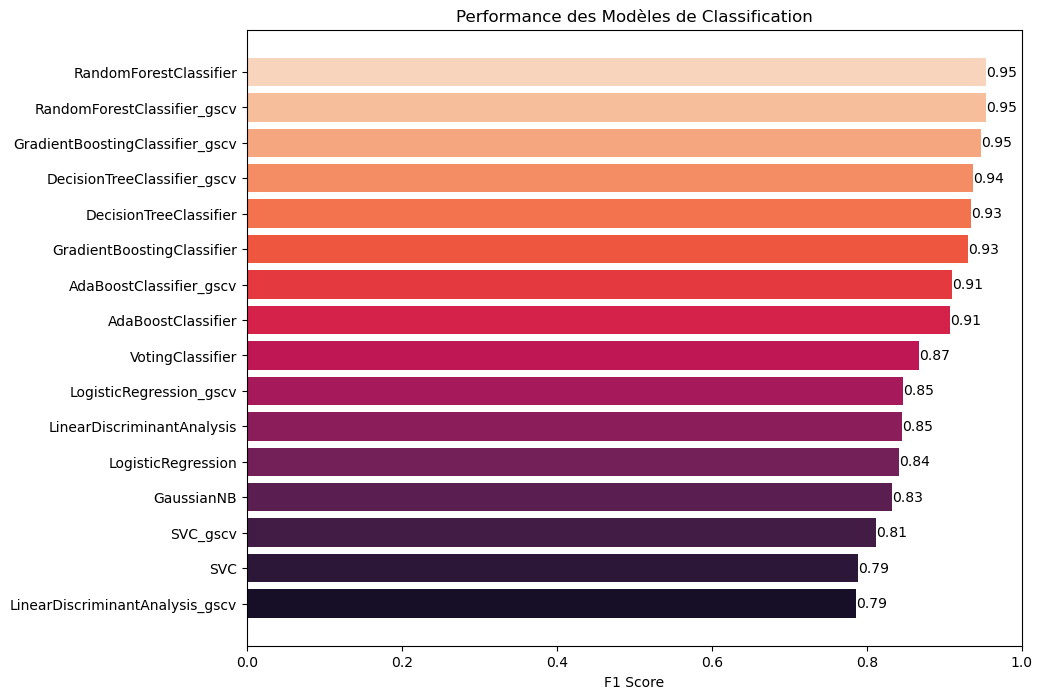

In [18]:
# Correction de la ligne de tri pour utiliser le score F1
sorted_scores = dict(sorted(model_scores.items(), key=lambda item: item[1]['f1_score']))

import seaborn as sns
import matplotlib.pyplot as plt

colors = sns.color_palette('rocket', len(sorted_scores))

# Tracer le graphique
plt.figure(figsize=(10, 8))
# Création du graphique à barres horizontales avec les scores F1
bars = plt.barh(list(sorted_scores.keys()), [info['f1_score'] for info in sorted_scores.values()], color=colors)
plt.xlabel('F1 Score')
plt.title('Performance des Modèles de Classification')
plt.xlim(0, 1)  # Limiter l'axe des x pour mieux visualiser les scores F1

# Ajouter les valeurs exactes sur les barres
for bar in bars:
    plt.text(bar.get_width(),  # Position horizontale, un peu à droite de la fin de la barre
             bar.get_y() + bar.get_height() / 2,  # Position verticale, au centre de la barre
             f'{bar.get_width():.2f}',  # Texte avec 2 décimales
             va='center',  # Alignement vertical au centre
             ha='left')  # Alignement horizontal à gauche pour que le texte suive la barre

plt.show()
